In [1]:
import warnings
import pandas as pd
import sys
import glob
sys.path.append('../scripts')
from exploration import *
warnings.filterwarnings('ignore')

In [2]:
import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("process.log"),
                              logging.StreamHandler()])
logger = logging.getLogger()

In [3]:
store_path = '../datasets/store.csv'
train_path = '../datasets/train.csv'
test_path = '../datasets/test.csv'
logger.info("Reading datasets")
store_df = pd.read_csv(store_path)
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
logger.info("Datasets read")

2025-01-03 22:26:05,266 - INFO - Reading datasets


2025-01-03 22:26:06,046 - INFO - Datasets read


In [4]:
# Combine the train and test data
combined_data = pd.concat([train_df, test_df], ignore_index=True)

# Merge with the store data
final_data = combined_data.merge(store_df, on='Store', how='left')

# Convert 'Date' to datetime format if not already done
final_data['Date'] = pd.to_datetime(final_data['Date'])

In [5]:
final_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


2025-01-03 22:26:06,679 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:06,690 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:06,724 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:06,730 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train Promo Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Promo Distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


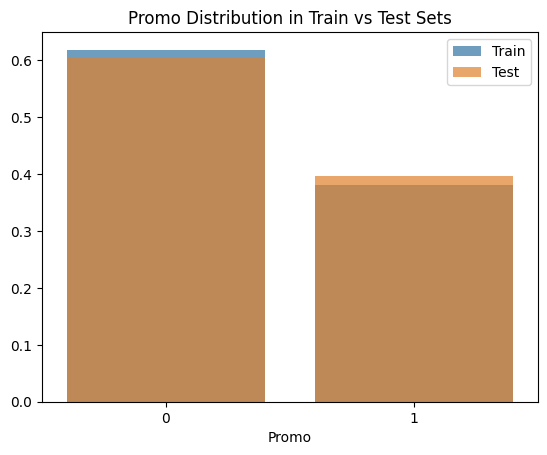

In [8]:
# Check distribution of promotions in training and test sets
check_promo_distribution(train_df, test_df)

In [9]:
# Sales during State Holidays
analyze_holiday_sales(train_df, 'StateHoliday')

No holidays found in the data.


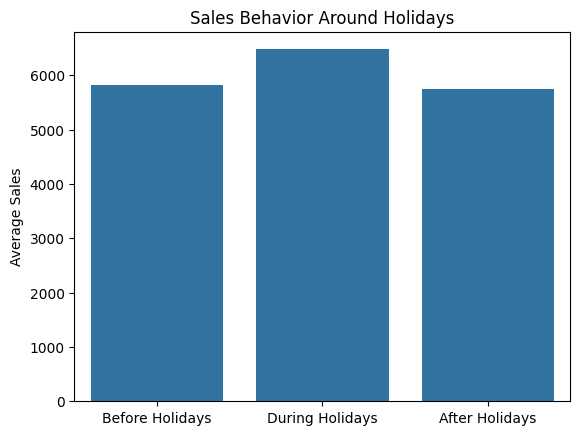

In [10]:
# Sales during School Holidays
analyze_holiday_sales(train_df, 'SchoolHoliday')

Correlation between Sales and Customers: 0.8947107733016958


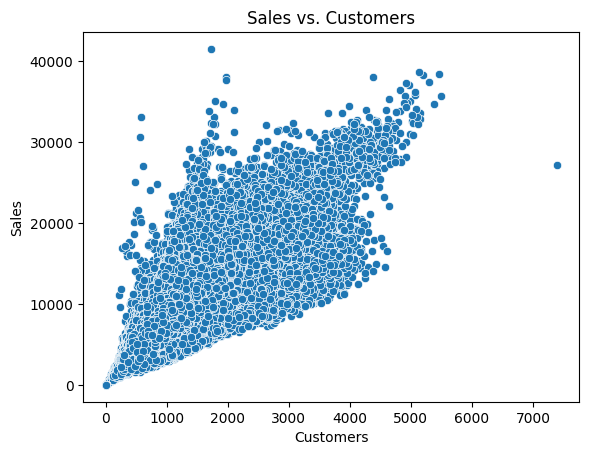

In [11]:
# Correlation between sales and customers
correlation_sales_customers(train_df)

In [12]:
analyze_promo_effect(train_df)

Sales with Promo: 7991.152045969903, Sales without Promo: 4406.050805160786
Customers with Promo: 820.0988146773861, Customers without Promo: 517.8235417537579


In [13]:
promo_deployment_analysis(train_df)

Stores with highest promo effectiveness:
Store
988     0.382572
1086    0.382166
1103    0.382166
1105    0.382166
7       0.382166
12      0.382166
1115    0.382166
5       0.382166
1106    0.382166
1108    0.382166
Name: Promo, dtype: float64


2025-01-03 22:26:10,634 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:10,641 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


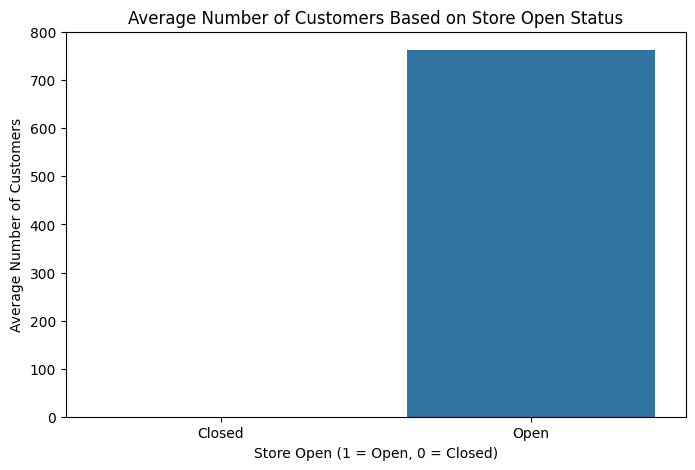

In [14]:
# Customer behavior during open and closed times
customer_behavior_open_close(final_data)

In [15]:
# Sales during weekdays
weekday_open_analysis(final_data)

Average weekend sales for stores open all weekdays: 3025.872894355006


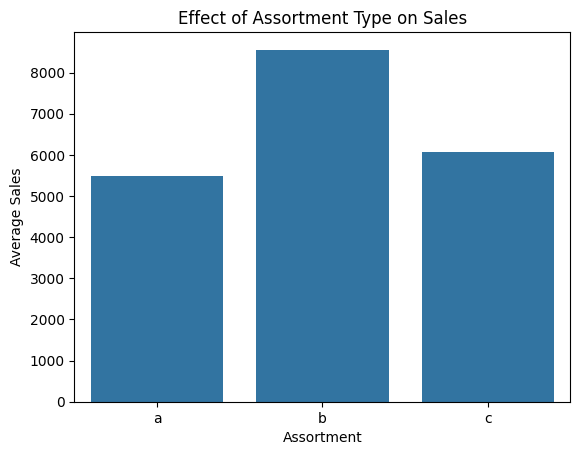

In [16]:
# Effect of assortment type on sales 
assortment_type_analysis(final_data)

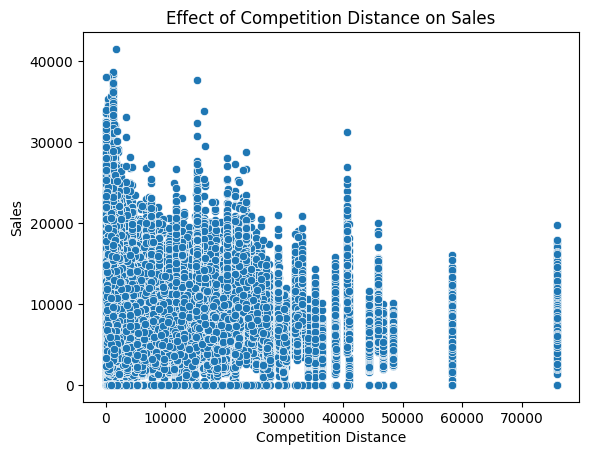

In [17]:
# Effect of competition distance on sales
competitor_distance_analysis(final_data)